## Exercício 1 de Análise de Componentes Independentes


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import entropy, chi2_contingency, shapiro

%matplotlib inline
from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

#Notes:
#SHAPIRO: The algorithm used is described in [R634] but censoring parameters as 
#        described are not implemented. For N > 5000 the W test statistic is 
#        accurate but the p-value may not be.

In [2]:
learning_rate = 1e-6
gaussian_distribution = np.random.normal(0,1,1000)
shapiro(np.random.uniform(-1,1,1000))

(0.9558212161064148, 8.625455615898748e-17)

In [3]:
filePath = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/FirstMixture1000Stats.txt'
distDataFrame = pd.read_table(filePath, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.T.head())

          0         1         2
0 -1.671230  1.624275  0.141849
1 -1.678474  2.195991 -0.200141
2 -1.591576  0.778850  0.746083
3  1.998872 -1.635852 -0.631749
4 -1.557389  1.213509  0.352850


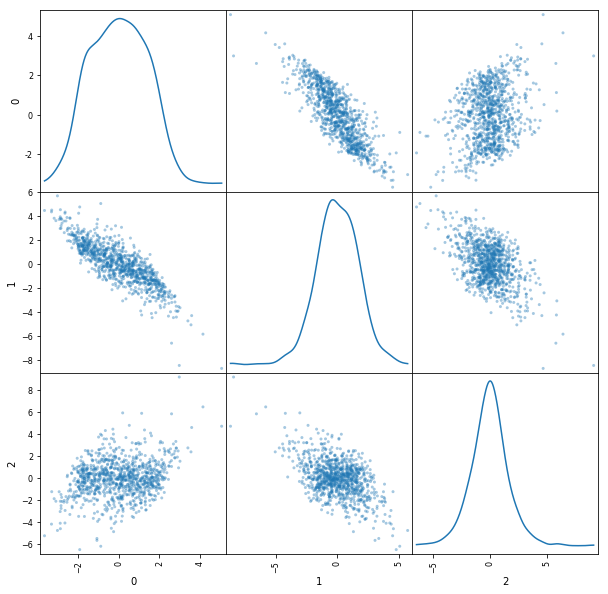

In [4]:
#scatter_hist(distDataFrame.values[0], distDataFrame.values[1], distDataFrame.values[2])
scatter_matrix(distDataFrame.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [5]:
resultsTable(mixtures)

Data,Negentropy test,KL Divergence test,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.0997,0.5303,0.9908,6.6714e-06
1,0.2697,0.2546,0.9895,1.4087e-06
2,0.4448,0.6521,0.9809,3.5273e-10


In [6]:
[yNPCA, WNPCA] = NPCA_RLS(mixtures, runs = 50)
scatter_matrix(pd.DataFrame(yNPCA.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()
#pd.DataFrame(y.T).describe()

NameError: name 'learningRate' is not defined

In [ ]:
WNPCA

In [ ]:
resultsTable(yNPCA)
plot_MutualInformation(mixtures, y = yNPCA, KDE = False)

In [ ]:
[yFeedback, WFeedback] = cichocki_Feedback(mixtures, runs  = 20)
scatter_matrix(pd.DataFrame(yFeedback.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [ ]:
resultsTable(yFeedback)
plot_MutualInformation(mixtures, y = yFeedback)

In [ ]:
[yFeedforward, WFeedforward] = cichocki_Feedforward(mixtures, runs = 20)
scatter_matrix(pd.DataFrame(yFeedforward.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))

plt.show()

In [ ]:
resultsTable(yFeedforward)
plot_MutualInformation(mixtures, y = yFeedforward)